<a href="https://colab.research.google.com/github/Son-mideok/e-Learning/blob/main/221115_5%EA%B0%95_Bidirectional_LSTM%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EA%B0%90%EC%A0%95_%EB%B6%84%EB%A5%98(sentiment_classification)_IMDB_Movie_Review_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 import

In [1]:
 import tensorflow_datasets as tfds
 import tensorflow as tf
 import matplotlib.pyplot as plt

# 그래프 시각화 함수 정의

In [2]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

# IMDB Movie Review Dataset 다운로드 및 Sanity Check

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAAG2KL/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAAG2KL/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAAG2KL/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
Vocabulary size: 8185


# Tokenizing을 테스트합니다.


In [4]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [5]:
assert original_string == sample_string

for index in encoded_string:
  print('{} -----> {}'.format(index, encoder.decode([index])))

4025 -----> Hell
222 -----> o 
6307 -----> Ten
2327 -----> sor
4043 -----> Fl
2120 -----> ow
7975 -----> .


# Batch size를 설정합니다.

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# training dataset을 준비합니다.

In [7]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [8]:
for x, y in train_dataset.take(1):
  print(x)
  print(y)

tf.Tensor(
[[  12 1329    7 ...    0    0    0]
 [7963 7679  194 ...    0    0    0]
 [  12   56  245 ...    0    0    0]
 ...
 [  12  284   14 ...    0    0    0]
 [  62 1087 1223 ...    0    0    0]
 [  62   32    9 ...    0    0    0]], shape=(64, 1639), dtype=int64)
tf.Tensor(
[0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1], shape=(64,), dtype=int64)


# Sentiment Classification을 위한 Bidirectional LSTM 구성

In [9]:
# Stack two or more LSTM layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

# compile 구성과 fit 함수 호출을 통한 training

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 79s 175ms/step - loss: 0.6514 - accuracy: 0.5572 - val_loss: 0.4539 - val_accuracy: 0.8042
Epoch 2/10
391/391 [==============================] - 67s 170ms/step - loss: 0.3470 - accuracy: 0.8606 - val_loss: 0.3443 - val_accuracy: 0.8594
Epoch 3/10
391/391 [==============================] - 68s 172ms/step - loss: 0.2537 - accuracy: 0.9075 - val_loss: 0.3438 - val_accuracy: 0.8552
Epoch 4/10
391/391 [==============================] - 68s 173ms/step - loss: 0.2096 - accuracy: 0.9258 - val_loss: 0.3376 - val_accuracy: 0.8698
Epoch 5/10
391/391 [==============================] - 67s 170ms/step - loss: 0.1723 - accuracy: 0.9451 - val_loss: 0.3700 - val_accuracy: 0.8615
Epoch 6/10
391/391 [==============================] - 68s 174ms/step - loss: 0.1538 - accuracy: 0.9517 - val_loss: 0.4023 - val_accuracy: 0.8630
Epoch 7/10
391/391 [==============================] - 68s 173ms/step - loss: 0.1385 - accuracy: 0.9592 - val_loss: 0.4020 - val_ac

# 샘플 텍스트에 대한 긍정 혹은 부정 예측


## 예측값이 > 0.5보다 크면 긍정리뷰, < 0.5면 부정리뷰로 판단합니다.

In [13]:
def sample_predict(sample_pred_text):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return(predictions)

In [14]:
# predict on a sample text
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[0.8393555]]


In [15]:
# predict on a sample text
sample_pred_text =  ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[-2.1827579]]


# accuracy와 loss 시각화

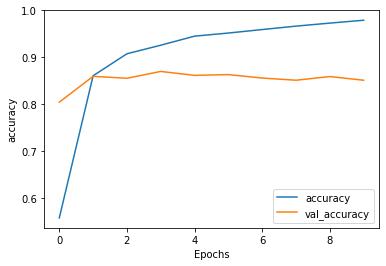

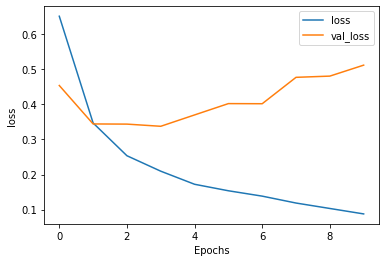

In [16]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')